In [16]:
# Purpose: Sample code to read GPCP data and make figures
# Author: Johnny Luo
# Date: Jan 2022
# Modified: March 2022

# import modules
#
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc 
import cartopy.crs as ccrs
import cmaps
from scipy import stats
from datetime import datetime, date, timedelta 

##########################################################################
# Open a netCDF file
#
filename = './GPCP_monthly_1979to2010.nc'
#filename = '/Users/zhengzhaoluo/Desktop/(Spr 2022) EAS417 SatMet/Python & Labs/GPCP_monthly_1979to2010.nc'
data = nc.Dataset(filename)

# Check file contents (e.g., variable names, dimensions, units, ...)
#
#print(data.variables.keys(),'\n')
#for var in data.variables.values():
#    print(var,'\n')
 
# Read variables from the netCDF file
#
time = np.array(data['time']) 
lon = np.array(data['lon'])
lat = np.array(data['lat'])
precip = np.array(data['precip'])

time_start = datetime(1800,1,1) + timedelta(days = time[0])
time_end   = datetime(1800,1,1) + timedelta(days = time[len(time)-1])
print('The starting time is: ',time_start)
print('The starting time is: ',time_end)

##########################################################################
# Average along the time dimension
#
precip_time_mean = np.mean(precip,axis=0) # Average along the 1st axis (ie, time)

# Average along the longitude dimension
#
precip_lon_mean = np.mean(precip,axis=2) # Average along the 3rd axis (ie, lon)

# print some basic info about the data
#
print('The dimension of the original data array is: ',precip.shape)
print('The dimension of the time mean array is:',precip_time_mean.shape)
print('The dimension of the zonal mean array is:',precip_lon_mean.shape)


The starting time is:  1979-01-01 00:00:00
The starting time is:  2021-12-01 00:00:00
The dimension of the original data array is:  (516, 72, 144)
The dimension of the time mean array is: (72, 144)
The dimension of the zonal mean array is: (516, 72)


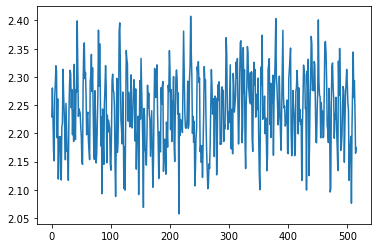

In [29]:
precip_time_series = np.mean(precip_lon_mean,axis=1)
precip_time_series.shape
plt.plot(precip_time_series)

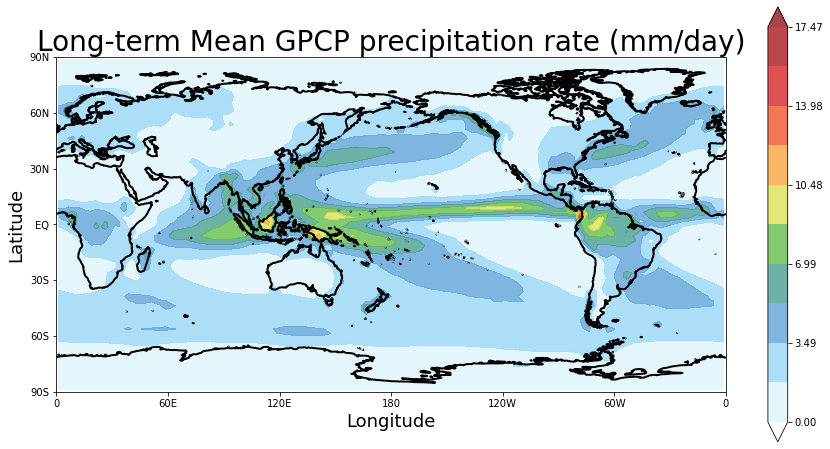

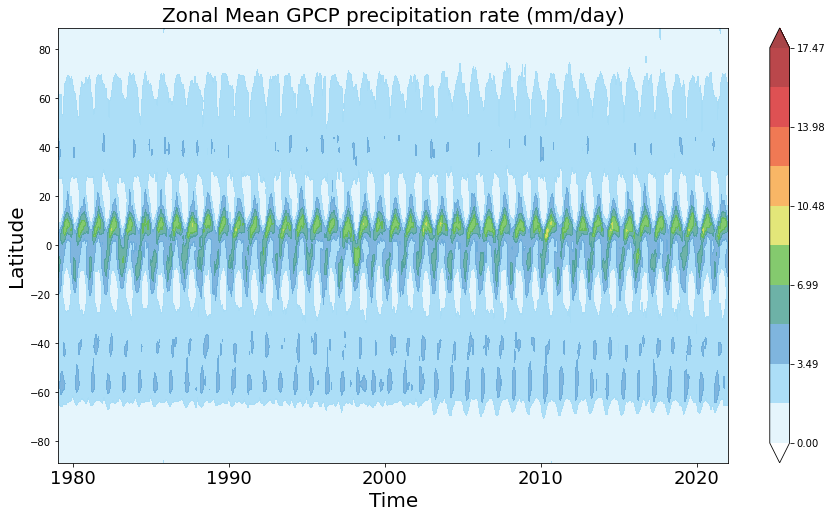

In [10]:
##########################################################################
# Plot the long term mean precipitation rate
#

# Set the lower/upper bound and range for contourf 
# (use 0.1 percentile and 99.9 percentile to avoid outliers)
#
percentile_95 = stats.scoreatpercentile(precip[precip>=0],99.9)
percentile_5 = stats.scoreatpercentile(precip[precip>=0],0.1)
range_val = percentile_95 - percentile_5
clevels = np.arange(percentile_5,percentile_95 + range_val/10, range_val/10)

fig1 = plt.figure(figsize = (15,8))    
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines(resolution='50m', color='black', linewidth=2)
#clevels = np.arange(0,15,1)
cs = ax.contourf(lon,lat,precip_time_mean,cmap=cmaps.WhiteBlueGreenYellowRed, levels=clevels, alpha = 0.8, extend = 'both',transform=ccrs.PlateCarree())
plt.xticks(np.arange(-180,180.1,60), ['0','60E','120E','180','120W','60W','0'], fontsize = 10)
plt.yticks(np.arange(-90,90.1,30), ['90S','60S','30S','EQ','30N','60N','90N'],fontsize = 10)
plt.xlabel('Longitude',fontsize=18)
plt.ylabel('Latitude',fontsize=18)
plt.title('Long-term Mean GPCP precipitation rate (mm/day)',fontsize=28)
plt.colorbar(cs)
plt.savefig('./gpcp_longTermMean_1979to2021.png')

# Plot the zonal mean (i.e., average out the longitude dimension) precipitation rate
#
fig2 = plt.figure(figsize=(15,8))
#clevels = np.arange(0,15,1)
time_axis = np.arange(1,len(time)+1)
#plt.contourf(time_axis,lat,np.transpose(precip_lon_mean)) # Simple contour
plt.contourf(time_axis,lat,np.transpose(precip_lon_mean),cmap=cmaps.WhiteBlueGreenYellowRed, levels=clevels, alpha = 0.8, extend = 'both')
plt.colorbar() # add colorbar
plt.xlabel('Time',fontsize = 20)
plt.ylabel('Latitude',fontsize = 20)
xtick_arr = np.array([12,132,252,372,492])
xticklabel_arr = ['1980','1990','2000','2010','2020']
plt.xticks(xtick_arr, xticklabel_arr, fontsize = 18)
plt.title('Zonal Mean GPCP precipitation rate (mm/day)',fontsize = 20)
#plt.show()
plt.savefig('./gpcp_zonalMean_1979to2021.png')


In [5]:
lon

array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,
        21.25,  23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,
        41.25,  43.75,  46.25,  48.75,  51.25,  53.75,  56.25,  58.75,
        61.25,  63.75,  66.25,  68.75,  71.25,  73.75,  76.25,  78.75,
        81.25,  83.75,  86.25,  88.75,  91.25,  93.75,  96.25,  98.75,
       101.25, 103.75, 106.25, 108.75, 111.25, 113.75, 116.25, 118.75,
       121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75,
       141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75,
       161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75,
       201.25, 203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75,
       221.25, 223.75, 226.25, 228.75, 231.25, 233.75, 236.25, 238.75,
       241.25, 243.75, 246.25, 248.75, 251.25, 253.75, 256.25, 258.75,
       261.25, 263.75, 266.25, 268.75, 271.25, 273.75, 276.25, 278.75,
      